Business Problem : To recommend country from where well rated wine with affordable price can be imported by client (Hotel TULIP)

In [2]:
!pip install wget  

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=782abb9d256e9551b25cefc2108b62550b95ae794da35a1688befbd82a2b2de9
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
"""  The below code gets the wine data from github link."""	
import wget
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/wine.json'
DataSet = wget.download(link_to_data)

In [4]:
!ls

sample_data  wine.json


## 0.2 Load Data  

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
file = 'wine.json'

In [8]:
#Print of top lines of dataframe 

with open(file, "r") as f:
    df=json.load(f)
df1 = pd.DataFrame(df)
df1.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


# Identify numerical variables

In [9]:
df1.describe(include = [np.number])

,price
count,120975.000000
mean,35.363389
std,41.022218
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [10]:
df1.describe(include = ['O'])

,points,title,description,taster_name,taster_twitter_handle,designation,variety,region_1,region_2,province,country,winery
count,129971,129971,129971,103727,98758,92506,129970,108724,50511,129908,129908,129971
unique,21,118840,119955,19,15,37979,707,1229,17,425,43,16757
top,88,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,"Cigar box, café au lait, and dried tobacco aro...",Roger Voss,@vossroger,Reserve,Pinot Noir,Napa Valley,Central Coast,California,US,Wines & Winemakers
freq,17207,11,3,25514,25514,2009,13272,4480,11065,36247,54504,222


## 1.1 Visualisation of price distribution (outliers)

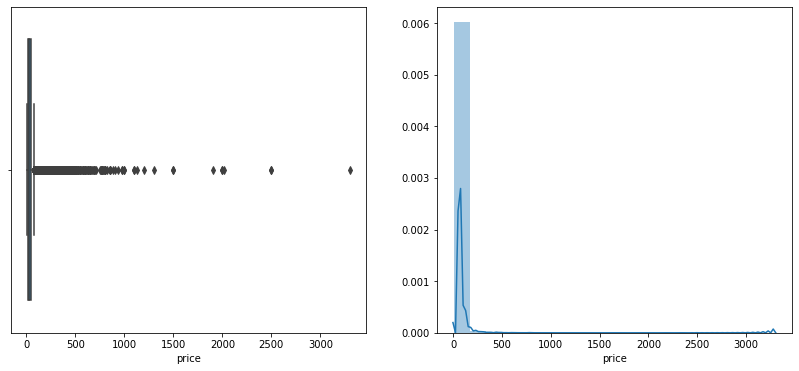

In [11]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(df1.price)
plt.subplot(1,2,2)
sns.distplot(df1.price, bins=20)
plt.show()

In [12]:
stat = df1.price.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64
The upper and lower bounds for suspected outliers are 79.5 and -20.5.


## 1.2 Find the 10 varieties of wine which receives the highest number of  reviews

In [14]:
""" The below code uses value_counts and nlargest functions to fetch the top 10 varieties of wine having the highest number of reviews."""
df3 = df1['variety'].value_counts().nlargest(10)
print(df3)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64


## 1.3 Find varieties of wine having the average price less than 20, with the average points at least 90

In [15]:
# The below code groups the data by variety and then calculates the average points and price of the same variety. Furthermore, the data was filtered for those varieties whose average points are more than 90 and the average price is less than 20. 

df1['points'] = df1['points'].astype(dtype=np.float64)
df4 = df1.groupby(['variety']).agg({'points': [np.mean], 'price': [np.mean]})
df4.columns = ['AvgPoints', 'AvgPrice']
df4.info()
df4 = df4[(df4.AvgPoints >= 90) & (df4.AvgPrice < 20)]
df4

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, Abouriou to Žilavka
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AvgPoints  707 non-null    float64
 1   AvgPrice   697 non-null    float64
dtypes: float64(2)
memory usage: 16.6+ KB


,AvgPoints,AvgPrice
variety,,
Blauburgunder,93.0,19.000000
Caprettone,92.0,19.000000
Kotsifali,92.0,13.000000
Ondenc,90.0,15.000000
Roussanne-Grenache Blanc,91.0,16.000000
Shiraz-Malbec,90.0,18.666667
Tinta Cao,90.0,14.000000


## 1.4 Build statistic table 

In [16]:
# The below code builds the statistical table using groupby and round function. The statistical table is written to statisticByState.csv. 
df5 = df1.groupby(['country']).agg({'variety' : [lambda z : z.mode()], 'points': [np.mean], 'price': [np.mean]})
df6 = df5.round(2)
df6.reset_index(level=0, inplace=True)
df6.columns = ['country', 'variety', 'AvgPoints', 'AvgPrice']
df6

,country,variety,AvgPoints,AvgPrice
0,Argentina,Malbec,86.71,24.51
1,Armenia,"[Kangoun, Rosé]",87.50,14.50
2,Australia,Shiraz,88.58,35.44
3,Austria,Grüner Veltliner,90.10,30.76
4,Bosnia and Herzegovina,"[Blatina, Vranec]",86.50,12.50
5,Brazil,Sparkling Blend,84.67,23.77
6,Bulgaria,Red Blend,87.94,14.65
7,Canada,Riesling,89.37,35.71
8,Chile,Cabernet Sauvignon,86.49,20.79
9,China,Cabernet Blend,89.00,18.00


In [17]:
#The statistical table was saved to 'statisticByState.csv'. 
df6.to_csv('statisticByState.csv', 
            encoding='utf-8', 
            index=False, 
            header=True)

## 1.5 Recommendations

Based on the analysis, I would recommend Hotel Tulip to source wine from India and Bulgaria on basis of good rating and lower price 

- Wine from India has one of the highest average points (90.22) at a relatively cheaper average price (13.33).

- Bulgaria is that it still has high average points of 87.94 but still a decent average price of 14.65. 

-Even though the average point of wine from China is higher, the average price of China's wine is more than that of Bulgaria.
